# ADVANCE DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## EXPORT THE DATA

In [2]:
df_fact_sales = pd.read_csv(r'C:\Users\harto\OneDrive\Dokumen\Python Course\3. Project\gold_fact_sales.csv')
df_dim_customers = pd.read_csv(r'C:\Users\harto\OneDrive\Dokumen\Python Course\3. Project\gold_dim_customers.csv')
df_dim_products = pd.read_csv(r'C:\Users\harto\OneDrive\Dokumen\Python Course\3. Project\gold_dim_products.csv')

## CLEAN THE DATA

In [3]:
df_fact_sales['order_date'] = pd.to_datetime(df_fact_sales['order_date'], dayfirst = True)
df_fact_sales['ship_date'] = pd.to_datetime(df_fact_sales['ship_date'], dayfirst = True)
df_fact_sales['due_date'] = pd.to_datetime(df_fact_sales['due_date'], dayfirst = True)
df_dim_customers['birth_date'] = pd.to_datetime(df_dim_customers['birth_date'], dayfirst = True)
df_dim_products['start_date'] = pd.to_datetime(df_dim_products['start_date'], dayfirst = True)

## 1. Explore Revenue Trends by Order Date Yearly

In [5]:
df_fact_sales['order_year'] = df_fact_sales['order_date'].dt.year.astype('Int64')

In [26]:
df_fact_sales.order_year

0        2010
1        2010
2        2010
3        2010
4        2010
         ... 
60393    2014
60394    2014
60395    2014
60396    2014
60397    2014
Name: order_year, Length: 60398, dtype: Int64

In [8]:
df_ans = df_fact_sales.pivot_table(values = 'sales_amount', index = 'order_year', aggfunc = 'sum')
df_ans

,sales_amount
order_year,
2010,43419
2011,7075088
2012,5842231
2013,16344878
2014,45642


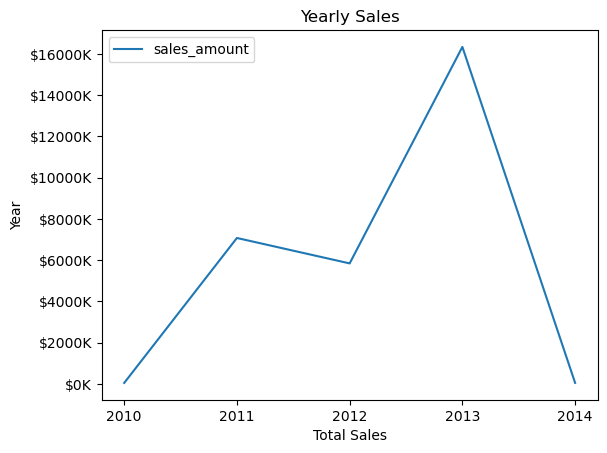

In [ ]:
fig, ax = plt.subplots()
df_ans.plot(kind = 'line', ax = ax)
plt.xticks(df_ans.index)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
plt.show()


## 2. Explore Sales Trend Monthly

In [19]:
df_fact_sales['order_month'] = df_fact_sales['order_date'].dt.month.astype('Int64')

In [22]:
df_ans_1 = df_fact_sales.pivot_table(values = 'sales_amount', index = 'order_month', aggfunc = 'sum')

In [23]:
df_ans_1.reset_index(inplace = True)

In [24]:
df_ans_1

,order_month,sales_amount
0,1,1868558
1,2,1744517
2,3,1908375
3,4,1948226
4,5,2204969
5,6,2935883
6,7,2412838
7,8,2684313
8,9,2536520
9,10,2916550


In [25]:
month_name_mapping = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec',
}

df_ans_1['order_month'] = df_ans_1['order_month'].map(month_name_mapping)

In [26]:
df_ans_1.set_index(keys = 'order_month', inplace = True)

In [28]:
df_ans_1

,sales_amount
order_month,
Jan,1868558
Feb,1744517
Mar,1908375
Apr,1948226
May,2204969
Jun,2935883
Jul,2412838
Aug,2684313
Sep,2536520


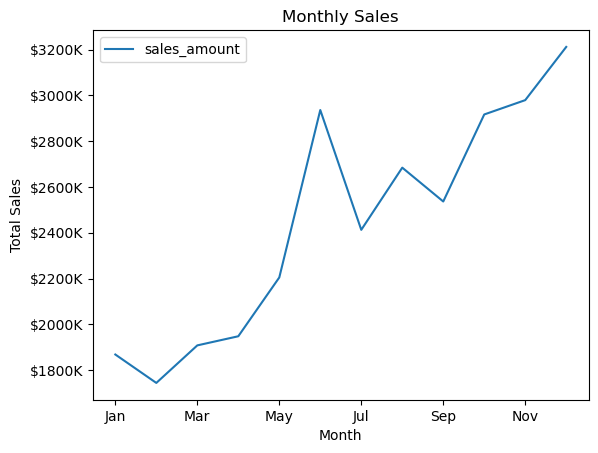

In [29]:
fig, ax = plt.subplots()
df_ans_1.plot(kind = 'line', ax = ax)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
plt.show()


## 3. Compare the Total Sales of Each Category

In [30]:
df_merge_factsales_dimcustomers = df_fact_sales.merge(right = df_dim_customers, left_on = 'customer_key', right_on = 'customer_key', how = 'left')
df_merge_factsales_dimproducts = df_fact_sales.merge(right = df_dim_products, left_on = 'product_key', right_on = 'product_key', how = 'left')

In [ ]:
df_ans_3 = df_merge_factsales_dimproducts.pivot_table(values = 'sales_amount', index = 'order_month', columns = 'category', aggfunc = 'sum')

In [ ]:
df_ans_3.reset_index(inplace = True)

In [ ]:
df_ans_3['order_month'] = df_ans_3['order_month'].map(month_name_mapping)

In [ ]:
df_ans_3.set_index(keys = 'order_month', inplace = True)

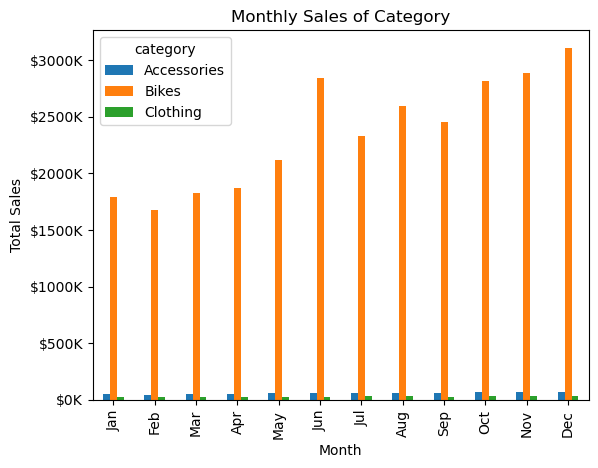

In [52]:
fig, ax = plt.subplots()
df_ans_3.plot(kind = 'bar', ax = ax)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales of Category')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))
plt.show()

## 4. Percentation of Number of Product ordered by category

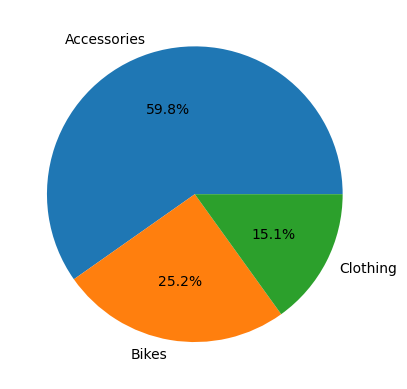

In [58]:
df_merge_factsales_dimproducts['category'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.show()

## 5. Head to Head comparation between top and bottom 5 sales

In [62]:

df_ans_5_1 = df_merge_factsales_dimproducts.pivot_table(values = 'sales_amount', index = 'product_name', aggfunc = 'sum').sort_values('sales_amount', ascending = False).head(5)
df_ans_5_2 = df_merge_factsales_dimproducts.pivot_table(values = 'sales_amount', index = 'product_name', aggfunc = 'sum').sort_values('sales_amount', ascending = True).head(5)


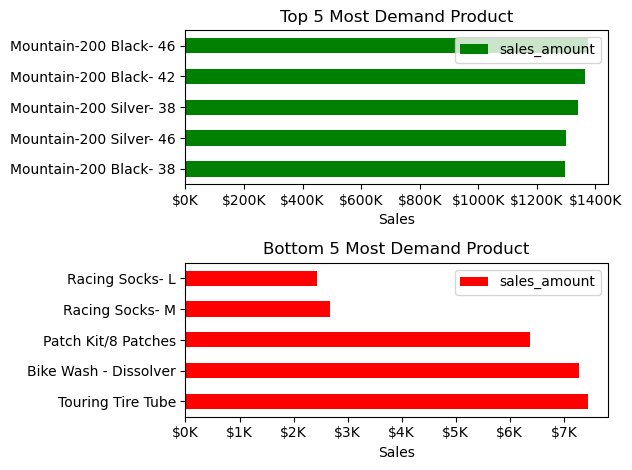

In [ ]:
fig, ax = plt.subplots(2,1)

## ax 1

df_ans_5_1.plot(kind = 'barh', ax = ax[0], color = 'g')
ax[0].set_xlabel('Sales')
ax[0].set_ylabel('')
ax[0].set_title('Top 5 Most Demand Product')
ax[0].invert_yaxis()
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

## ax 2

df_ans_5_2.plot(kind = 'barh', ax = ax[1], color = 'r')
ax[1].set_xlabel('Sales')
ax[1].set_ylabel('')
ax[1].set_title('Bottom 5 Most Demand Product')
ax[1].invert_yaxis()
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos : f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

## 6. Trend Sales by Country

In [88]:
df_ans_6 = df_merge_factsales_dimcustomers.pivot_table(values = 'sales_amount', index = 'order_month', columns = 'country', aggfunc = 'sum')

In [89]:
df_ans_6.reset_index(inplace = True)

In [91]:
df_ans_6['order_month'] = df_ans_6['order_month'].map(month_name_mapping)

In [93]:
df_ans_6.set_index(keys = 'order_month', inplace = True)

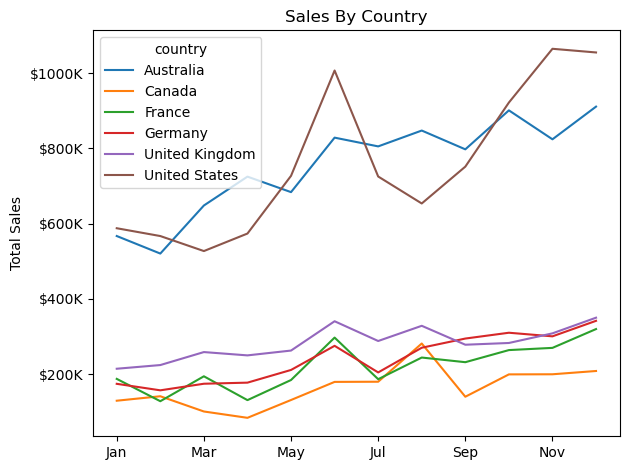

In [96]:
fig, ax = plt.subplots()

df_ans_6.plot(kind = 'line', ax = ax)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos : f'${int(y/1000)}K'))

plt.xlabel('')
plt.ylabel('Total Sales')
plt.title('Sales By Country')
plt.tight_layout()
plt.show()

